# **Stroke Prediction**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading Data

In [2]:
df = pd.read_csv('../DataSets/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Understanding the Data

In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
df.shape

(5110, 12)

In [5]:
df.size

61320

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [10]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

# Visualizations

<AxesSubplot:>

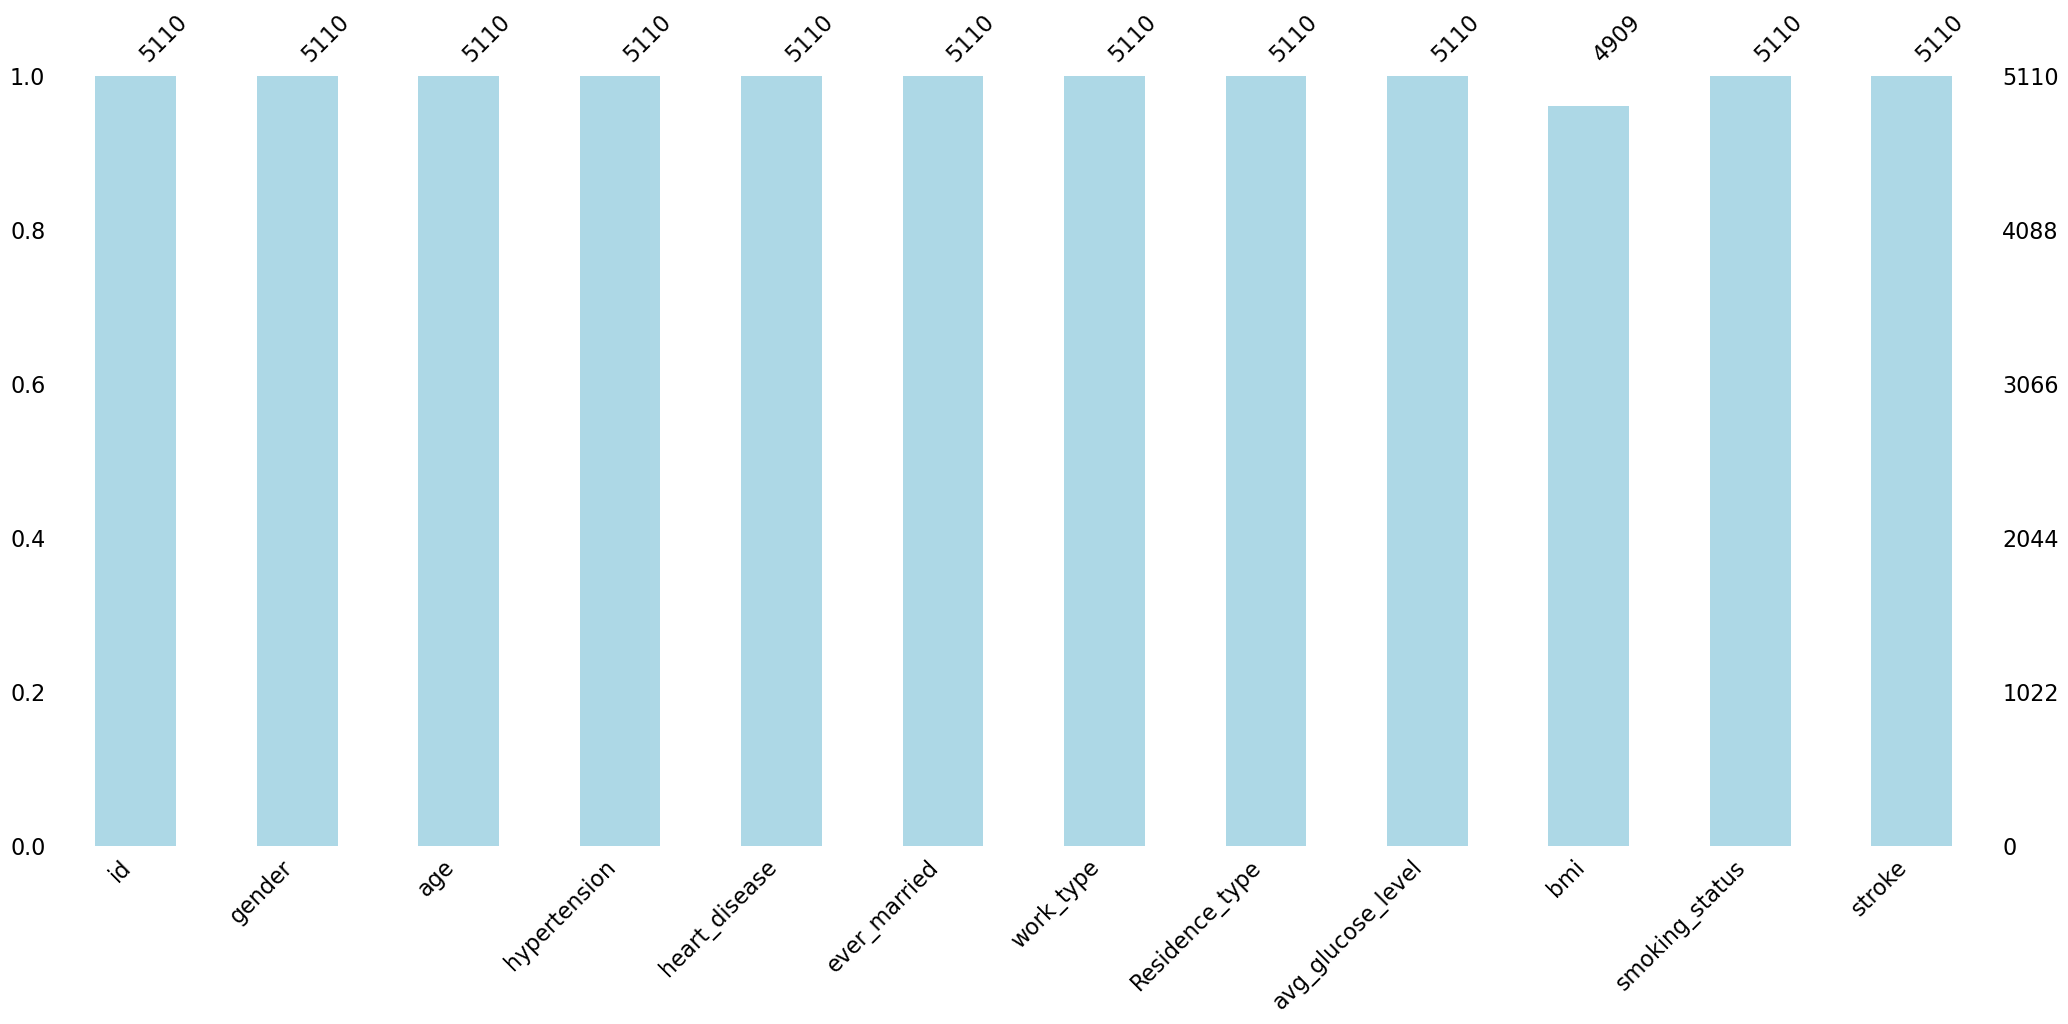

In [12]:
import missingno as no
no.bar(df, color='lightblue')

<AxesSubplot:>

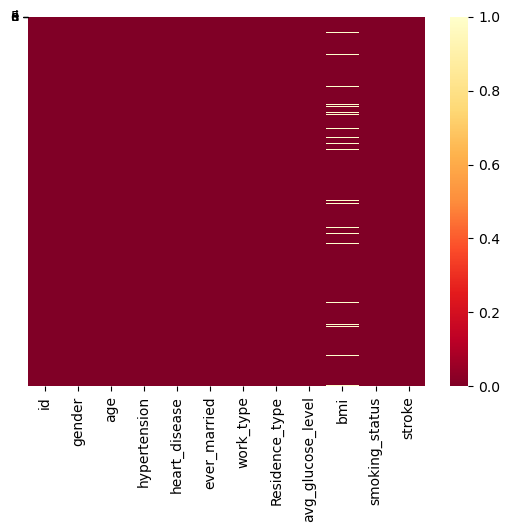

In [13]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlOrRd_r')

# Handling Missing Values

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [16]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

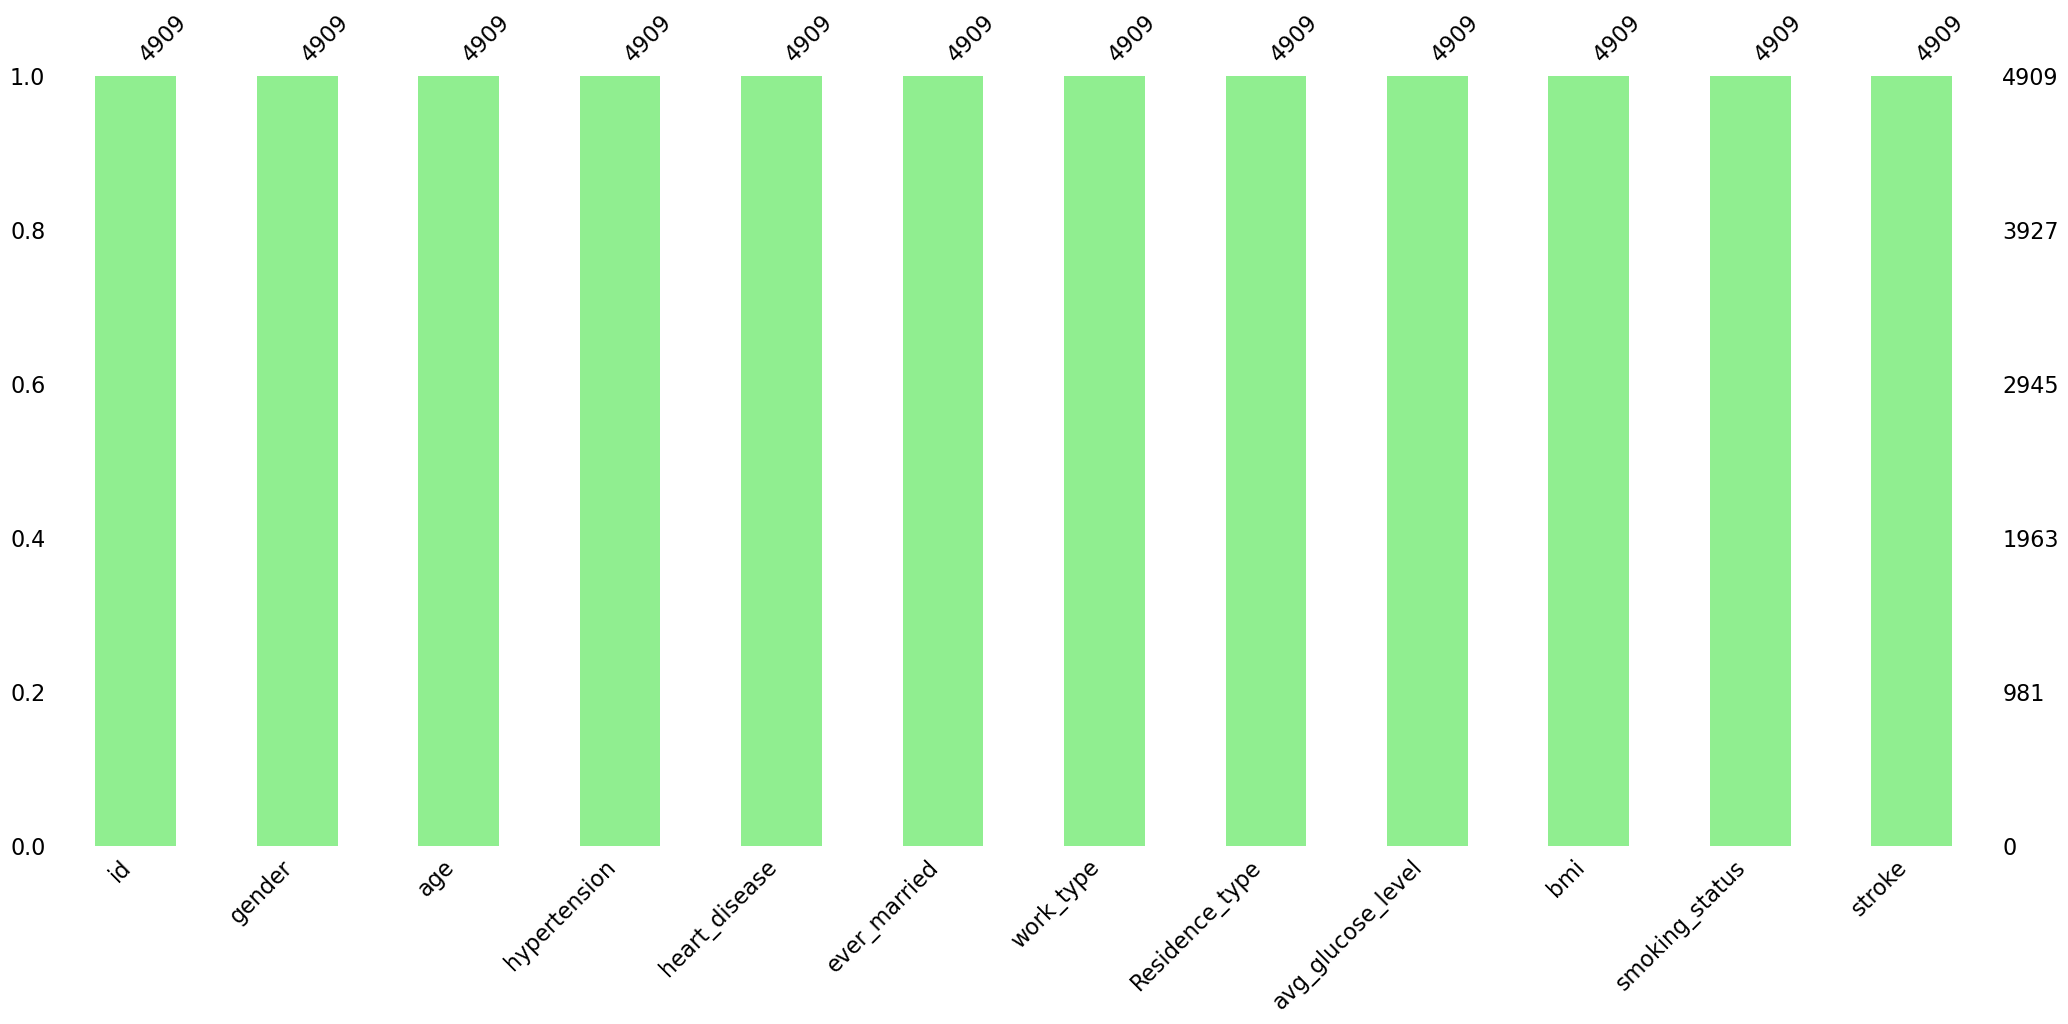

In [17]:
no.bar(df, color='lightgreen')

In [18]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


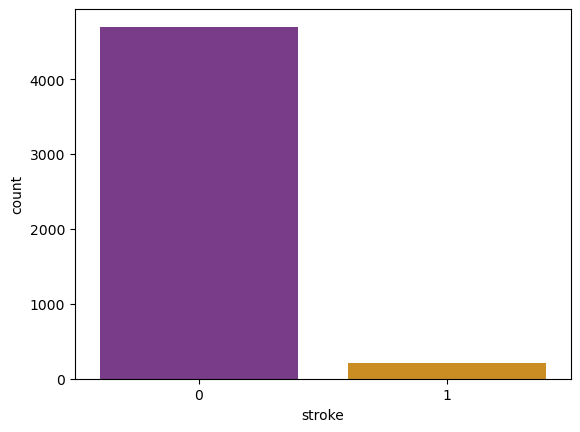

In [19]:
sns.countplot(df.stroke, palette='CMRmap')
plt.show()

In [20]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

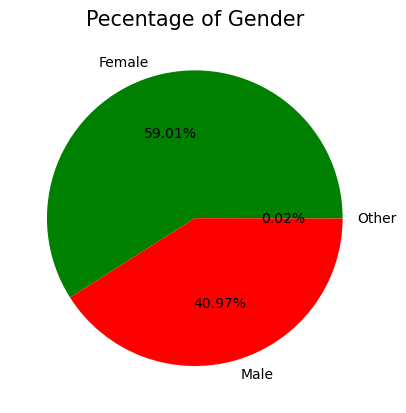

In [21]:
df1 = df['gender'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%', colors='gr')
plt.title('Pecentage of Gender', fontsize=15)
plt.show()

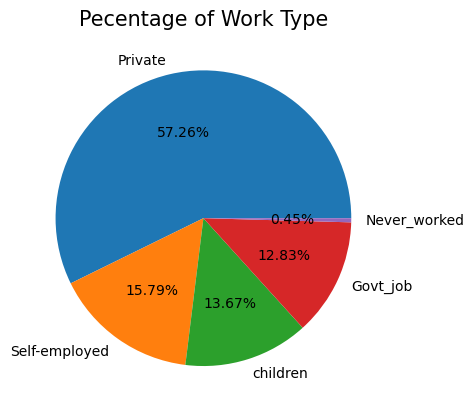

In [22]:
df1 = df['work_type'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Pecentage of Work Type', fontsize=15)
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

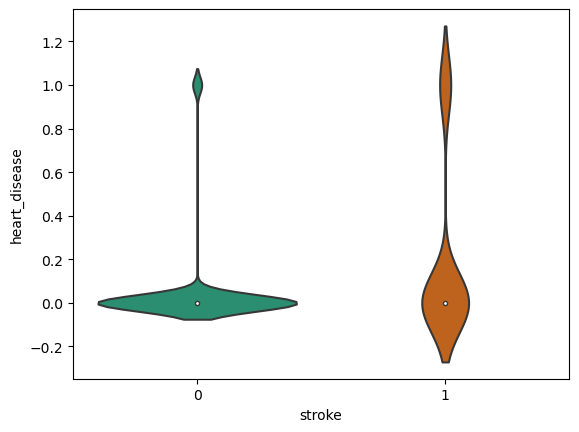

In [23]:
sns.violinplot(x=df.stroke, y=df.heart_disease, palette='Dark2')

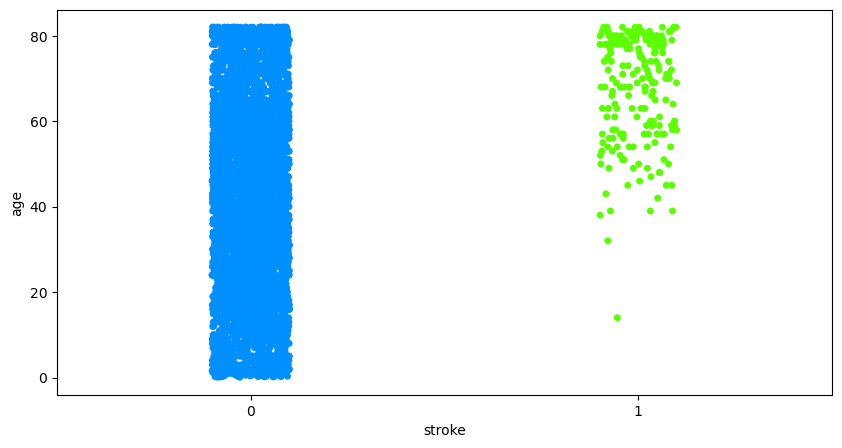

In [24]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['stroke'], y=df.age, palette='gist_rainbow_r')
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

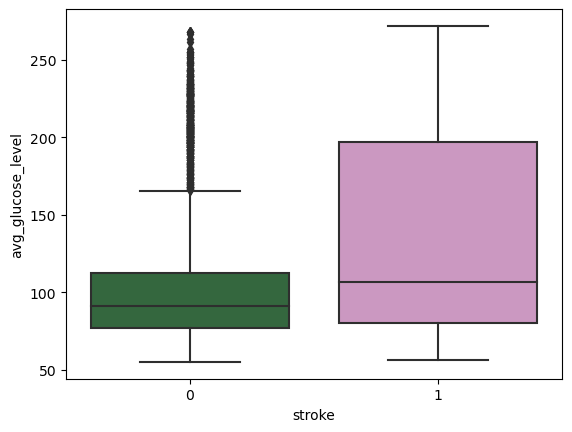

In [25]:
sns.boxplot(data=df, y='avg_glucose_level', x='stroke', palette='cubehelix')

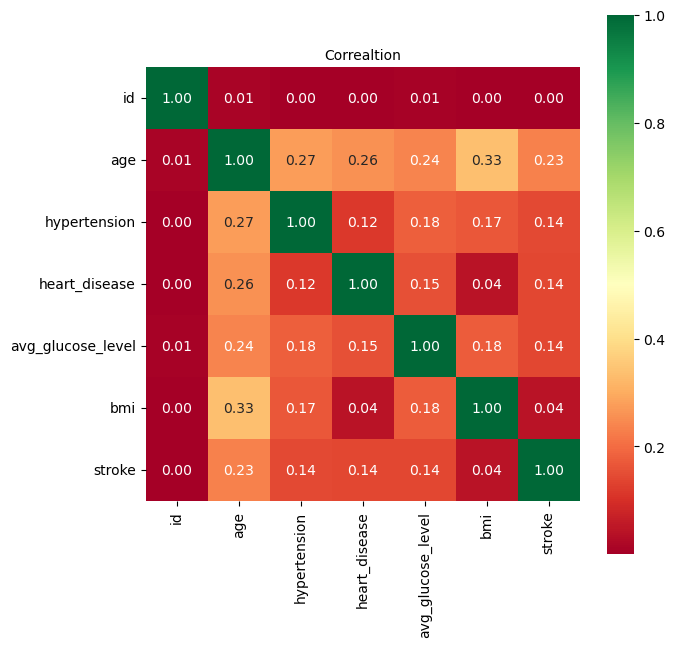

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap="RdYlGn")
plt.title("Correaltion", size=10)
plt.show()

<Figure size 2500x1500 with 0 Axes>

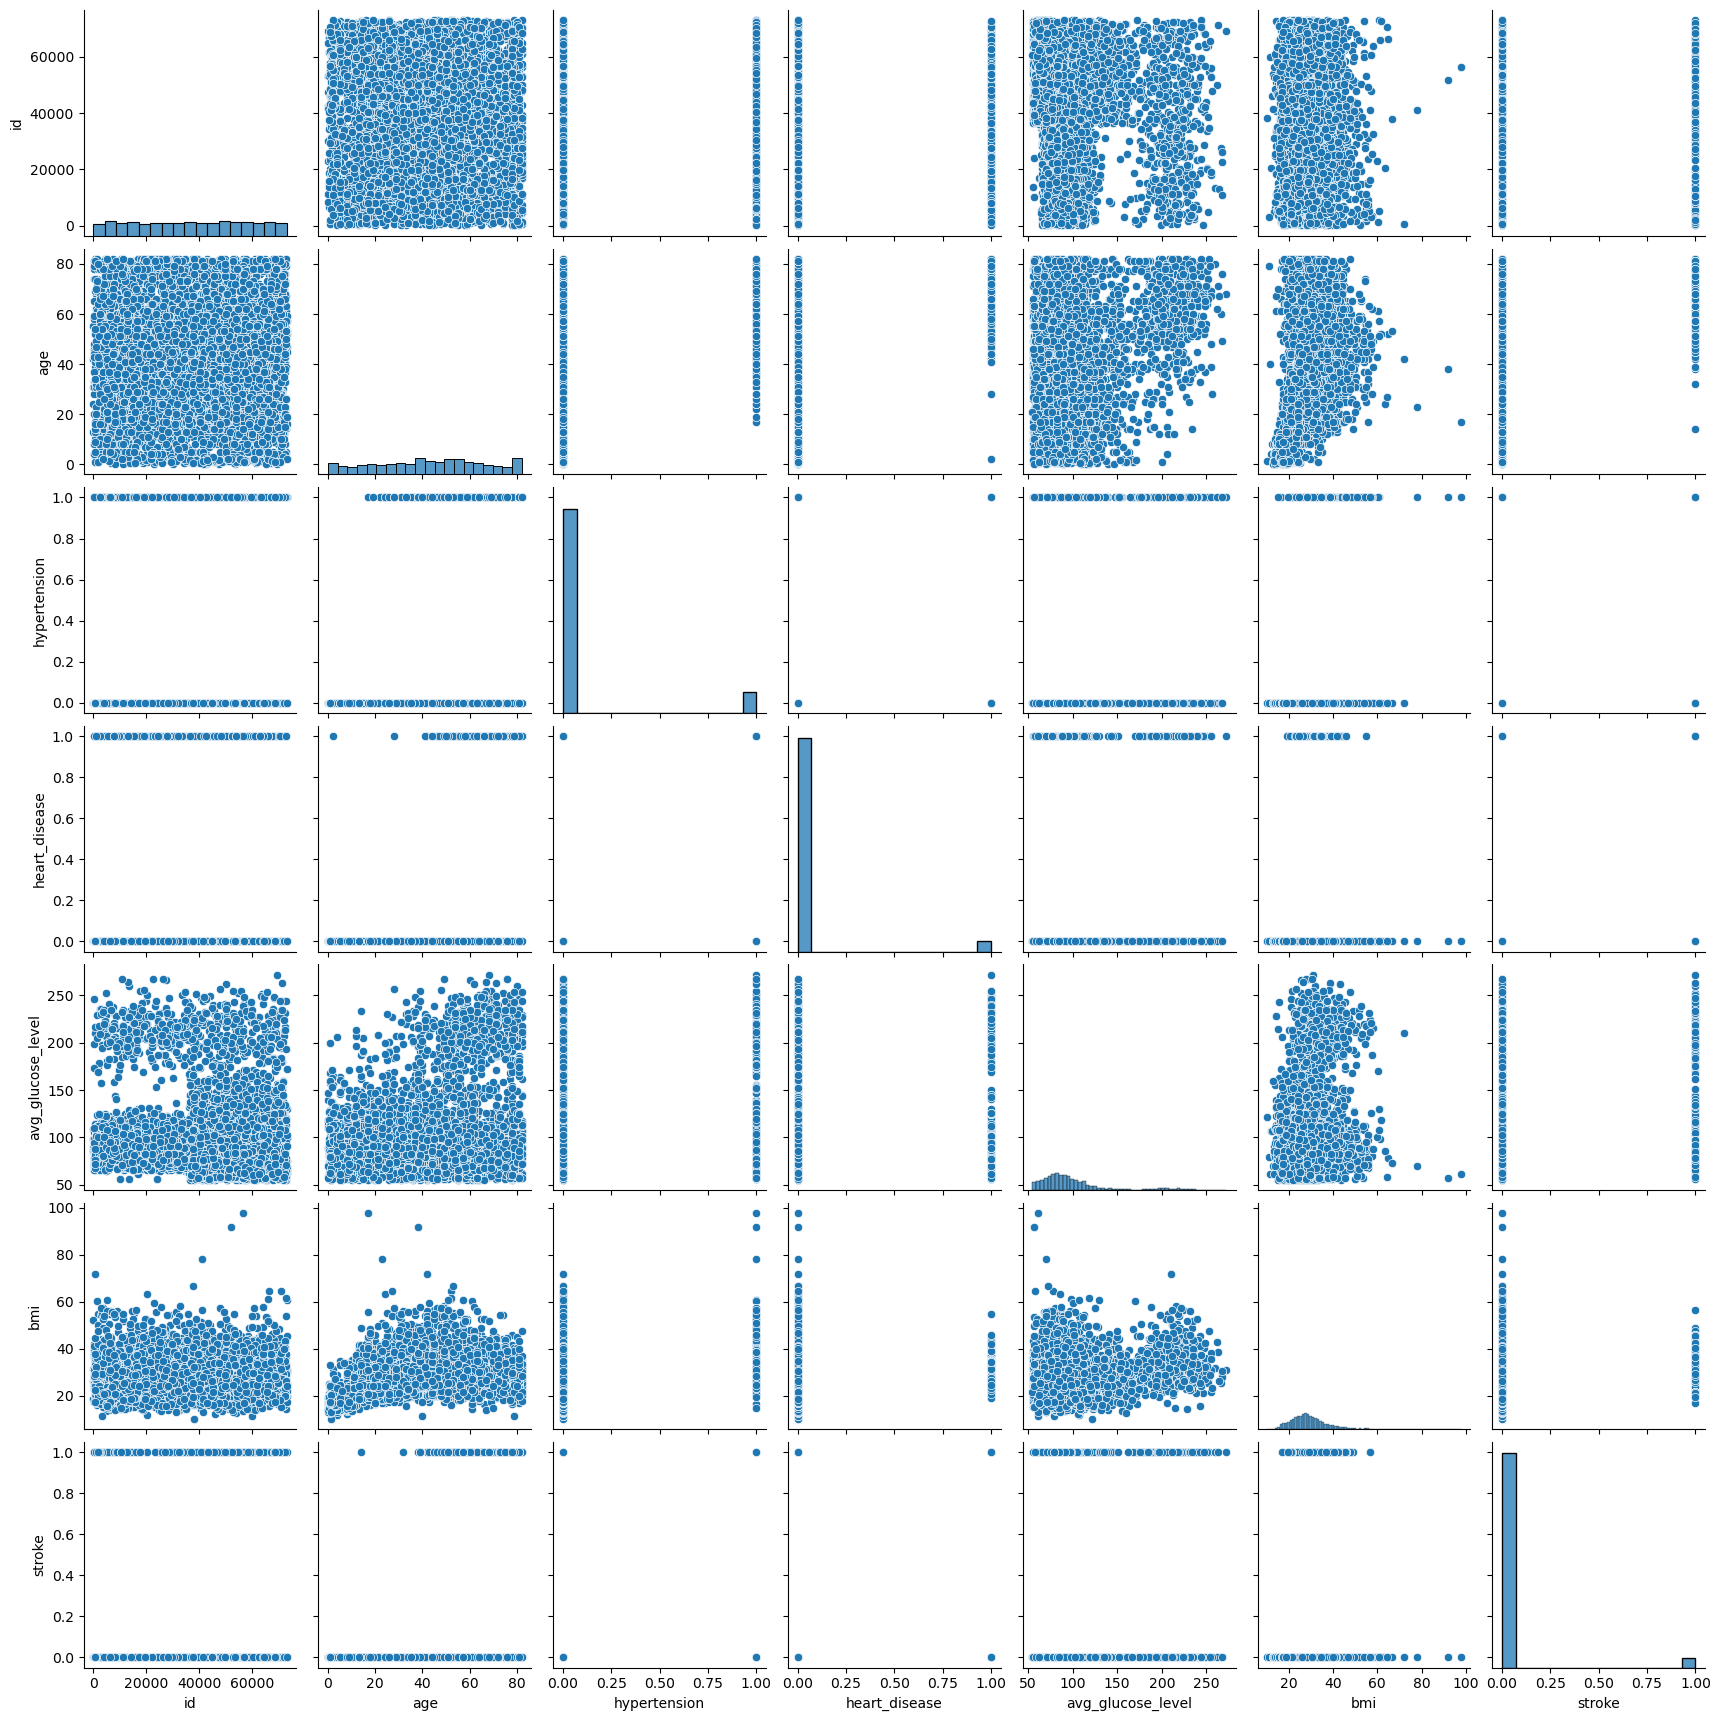

In [27]:
plt.figure(figsize=(25,15))
sns.pairplot(data=df, palette='gist_rainbow')
plt.show()

In [28]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1,  'Other':1,})
df['Residence_type'] = df['Residence_type'].map({'Urban':0, 'Rural':1})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df['ever_married'] = df['ever_married'].map({'Yes':0, 'No':1})
df['work_type']= df['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


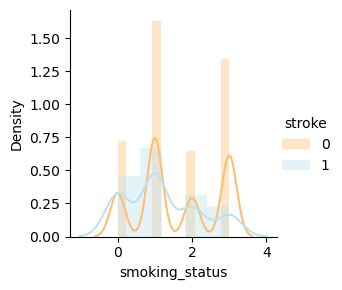

In [29]:
sns.FacetGrid(df, hue='stroke', palette='RdYlBu').map(sns.distplot, 'smoking_status').add_legend()

<Figure size 2000x1500 with 0 Axes>

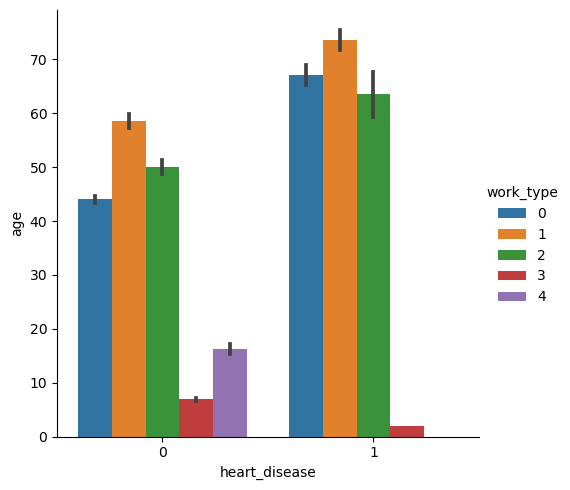

In [30]:
plt.figure(figsize=(20,15))
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=df)

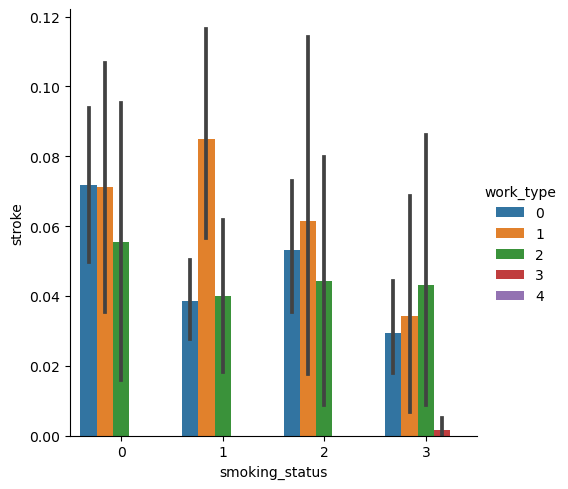

In [31]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=df)

# Splitting the Data into Dependent and Independent Variables

In [32]:
features = ['age', 'hypertension', 'heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','gender','work_type','smoking_status']
label = ['stroke']
x = df[features]
y = df[label]

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X, y = smote.fit_resample(x,y)

# Training and Testing the Data

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [36]:
lm = LogisticRegression(random_state=5)
lm.fit(Xtrain, ytrain)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

## Prediction

In [37]:
ypred_train = lm.predict(Xtrain)
ypred_test = lm.predict(Xtest)
print(ypred_test)

[0 0 0 ... 0 0 1]


## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred_test)
cm

array([[725, 197],
       [161, 797]], dtype=int64)

<AxesSubplot:>

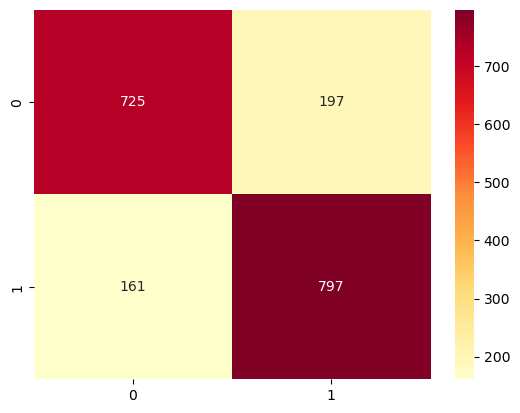

In [39]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Accuracy

In [40]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 82.19414893617021
Accuracy of testing data: 80.95744680851064


# Support Vector Machine

In [41]:
svc = SVC(C=10)
svc.fit(Xtrain, ytrain)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

## Prediction

In [42]:
ypred_train = svc.predict(Xtrain)
ypred_test = svc.predict(Xtest)

## Confusion Matrix

In [43]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[671, 161],
       [251, 797]], dtype=int64)

<AxesSubplot:>

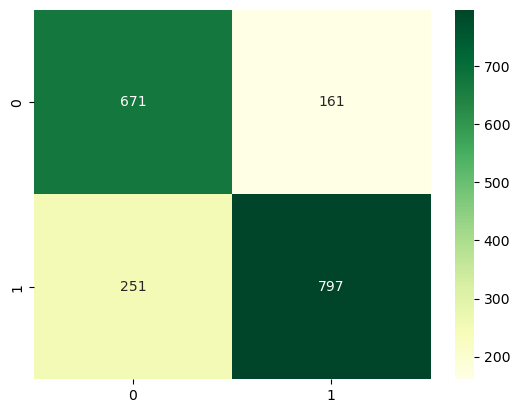

In [44]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

## Accuracy

In [45]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 79.33510638297872
Accuracy of testing data: 78.08510638297872


# Decission Tree

In [46]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

## Prediction

In [47]:
ypred_train = dt.predict(Xtrain)
ypred_test = dt.predict(Xtest)

## Confusion Matrix

In [48]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[825,  71],
       [ 97, 887]], dtype=int64)

<AxesSubplot:>

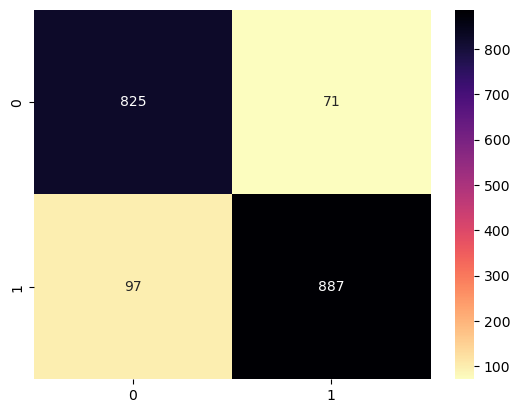

In [49]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="magma_r" ,fmt='g')

[Text(0.5, 0.875, 'X[0] <= 49.037\ngini = 0.5\nsamples = 7520\nvalue = [3778, 3742]'), Text(0.25, 0.625, 'X[0] <= 38.007\ngini = 0.17\nsamples = 2498\nvalue = [2264, 234]'), Text(0.125, 0.375, 'X[3] <= 0.5\ngini = 0.048\nsamples = 1697\nvalue = [1655, 42]'), Text(0.0625, 0.125, 'gini = 0.14\nsamples = 515\nvalue = [476, 39]'), Text(0.1875, 0.125, 'gini = 0.005\nsamples = 1182\nvalue = [1179, 3]'), Text(0.375, 0.375, 'X[4] <= 0.5\ngini = 0.364\nsamples = 801\nvalue = [609, 192]'), Text(0.3125, 0.125, 'gini = 0.461\nsamples = 474\nvalue = [303, 171]'), Text(0.4375, 0.125, 'gini = 0.12\nsamples = 327\nvalue = [306, 21]'), Text(0.75, 0.625, 'X[9] <= 2.5\ngini = 0.421\nsamples = 5022\nvalue = [1514, 3508]'), Text(0.625, 0.375, 'X[8] <= 1.5\ngini = 0.389\nsamples = 4659\nvalue = [1231, 3428]'), Text(0.5625, 0.125, 'gini = 0.357\nsamples = 4394\nvalue = [1021, 3373]'), Text(0.6875, 0.125, 'gini = 0.329\nsamples = 265\nvalue = [210, 55]'), Text(0.875, 0.375, 'X[5] <= 205.925\ngini = 0.344\nsam

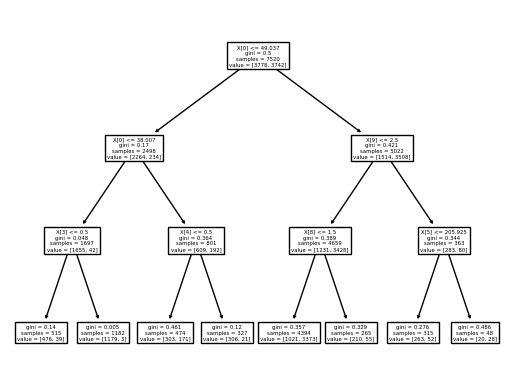

In [50]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(Xtrain, ytrain)
print(tree.plot_tree(clf_tree))

## Accuracy

In [51]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 91.06382978723404


# K Nearest Neighbour

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

## Prediction

In [53]:
ypred_train = knn.predict(Xtrain)
ypred_test = knn.predict(Xtest)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

## Confusion Matrix

In [54]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[766,  18],
       [156, 940]], dtype=int64)

<AxesSubplot:>

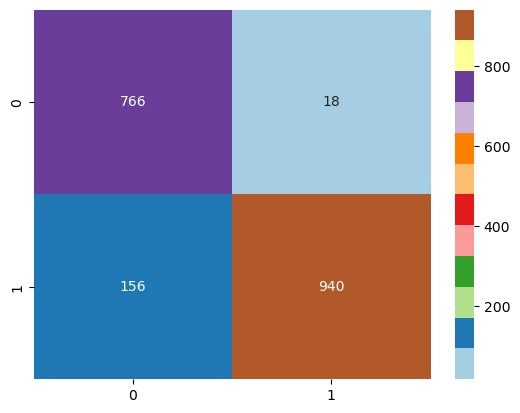

In [55]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Paired" ,fmt='g')

## Accuracy

In [56]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 93.84308510638299
Accuracy of testing data: 90.74468085106383


# Naive Bayes

In [57]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## Prediction

In [58]:
ypred_train = gnb.predict(Xtrain)
ypred_test = gnb.predict(Xtest)

## Confusion Matrix

In [59]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[614,  68],
       [308, 890]], dtype=int64)

<AxesSubplot:>

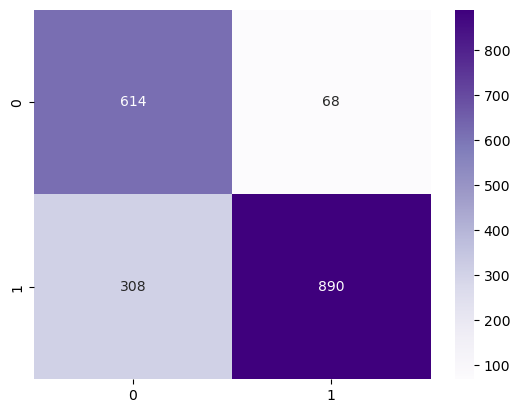

In [60]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

## Accuracy

In [61]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 80.1063829787234
Accuracy of testing data: 80.0


# Random Forest Classifier

In [62]:
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain, ytrain)

C:\Users\USER\AppData\Local\Temp\ipykernel_14460\2957823113.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(Xtrain, ytrain)


RandomForestClassifier(random_state=42)

## Prediction

In [63]:
ypred_train = rf.predict(Xtrain)
ypred_test = rf.predict(Xtest)

## Confusion Matrix

In [64]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[856,  44],
       [ 66, 914]], dtype=int64)

<AxesSubplot:>

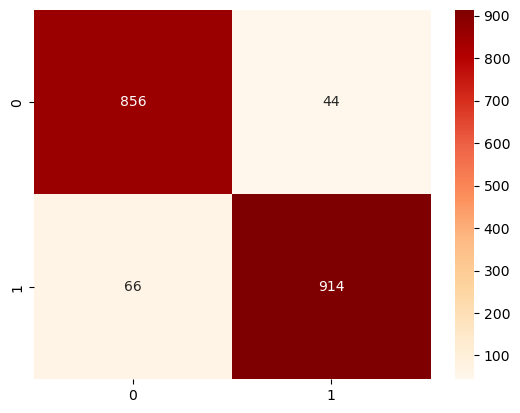

In [65]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="OrRd" ,fmt='g')

## Accuracy

In [66]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac6 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac6)

Accuracy of training data: 100.0
Accuracy of testing data: 94.14893617021278


# Comparing Accuracy of Different Models

In [67]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'Decission Tree', ac4:'KNN', ac5: 'Naive Bayes', ac6: 'Random Forest'}

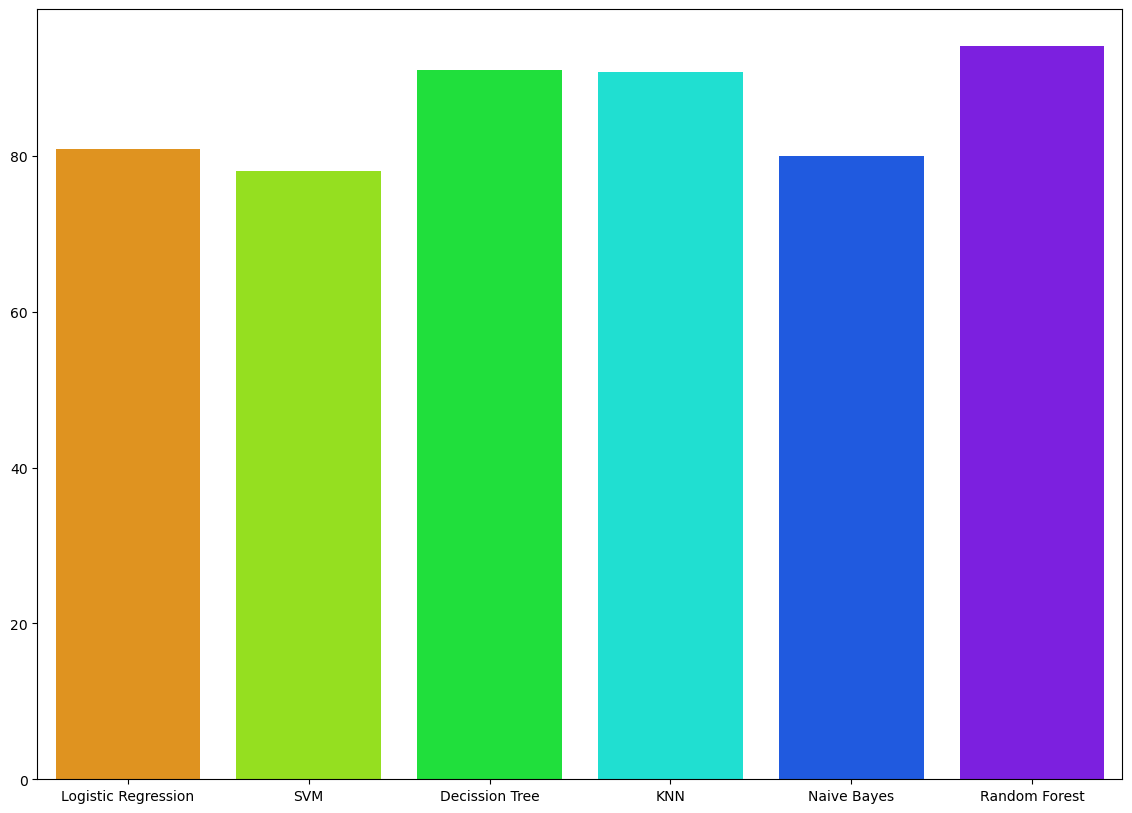

In [68]:
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');